In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv("Dataset/bots_vs_users.csv")

In [3]:
data.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [4]:
data.describe()

,target,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness
count,5874.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,0.500000,18.629044,19.552487,0.156463,0.143918,7.730661,544.752035,0.895945,0.610812,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009
std,0.500043,4.231994,41.954881,0.202730,0.187085,11.278711,746.728130,0.170084,2.461709,0.397830,0.033136,1617.635460,154.970296,0.009545,0.229815
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.400000,0.000000,0.000000,1.100000,86.600000,0.850000,0.000000,0.050000,0.000000,9.125000,1.980000,0.000000,0.580000
50%,0.500000,20.000000,7.600000,0.100000,0.050000,3.400000,267.800000,0.950000,0.000000,0.300000,0.000000,268.950000,30.950000,0.000000,0.710000
75%,1.000000,20.000000,26.075000,0.200000,0.200000,7.850000,616.850000,1.000000,0.200000,0.900000,0.000000,746.050000,89.480000,0.000000,0.830000
max,1.000000,20.000000,894.900000,1.000000,1.000000,61.600000,5841.250000,1.000000,64.050000,1.000000,0.950000,41415.700000,2866.590000,0.300000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [6]:
data.columns.tolist()

['has_domain',
 'has_birth_date',
 'has_photo',
 'can_post_on_wall',
 'can_send_message',
 'has_website',
 'gender',
 'has_short_name',
 'has_first_name',
 'has_last_name',
 'access_to_closed_profile',
 'is_profile_closed',
 'target',
 'has_nickname',
 'has_maiden_name',
 'has_mobile',
 'all_posts_visible',
 'audio_available',
 'has_interests',
 'has_books',
 'has_tv',
 'has_quotes',
 'has_about',
 'has_games',
 'has_movies',
 'has_activities',
 'has_music',
 'can_add_as_friend',
 'can_invite_to_group',
 'subscribers_count',
 'is_blacklisted',
 'has_career',
 'has_military_service',
 'has_hometown',
 'marital_status',
 'has_universities',
 'has_schools',
 'has_relatives',
 'is_verified',
 'is_confirmed',
 'has_status',
 'posts_count',
 'avg_likes',
 'links_ratio',
 'hashtags_ratio',
 'avg_keywords',
 'avg_text_length',
 'attachments_ratio',
 'avg_comments',
 'reposts_ratio',
 'ads_ratio',
 'avg_views',
 'posting_frequency_days',
 'phone_numbers_ratio',
 'avg_text_uniqueness',
 'city',


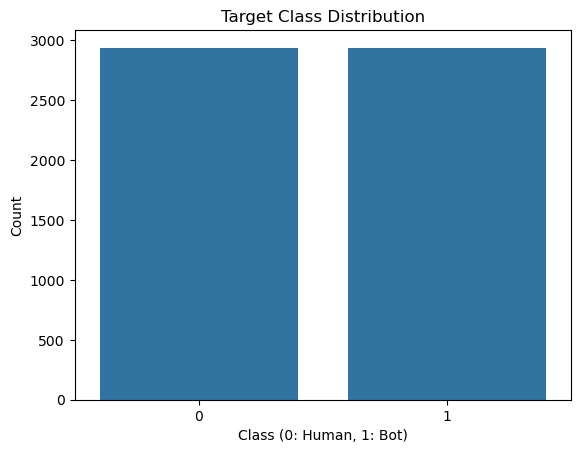

In [7]:
sns.countplot(x='target', data=data)
plt.title('Target Class Distribution')
plt.xlabel('Class (0: Human, 1: Bot)')
plt.ylabel('Count')
plt.show()
#Чекаем распределение классов

In [8]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
# Отделяем категореальные колонки от числовых для замены во всех них нулевых значениях

In [9]:
numerical_cols.remove("target")

In [10]:
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
# Заменяем пустые значения в числовых колонках медианой

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
#Заполнение пустых значений в категориальных колонках

In [13]:
data[categorical_cols].head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
1,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
2,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
3,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
4,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)

# Results
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))